<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [43]:
import pandas as pd
import numpy as np

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import io

In [71]:
# Set library parameters
sns.set_theme(color_codes=True)
pd.options.display.max_rows = None
pd.options.display.max_columns = None
# disable warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Loading the dataset

In [ ]:
# Load the data
data = pd.read_csv('D:/Dev/Projects/Python/AI-ML/Bank-Churn-Prediction/bank-1.csv')
# Make a copy of the data
df_backup = data.copy()
# Display the first 5 rows of the data
data.shape

(10000, 14)

## Data Overview

In [21]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [22]:
# Check data tupe of each column
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [23]:
# Check for missing values
data.isnull().head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [24]:

# Check columns list and missing values total
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [25]:
# check unique values in each column
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [49]:
# There is no use of columns like RowNumber, CustomerId, Surname, so lets drop them
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [27]:
# Check the shape of the data
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Data Cleaning
- Dropped columns: `RowNumber`, `CustomerId`, `Surname` as they are not useful for prediction.
- Checked for missing values and found none.

### Data Overview
- The dataset contains various features such as `CreditScore`, `Geography`, `Gender`, `Age`, `Tenure`, `Balance`, `NumOfProducts`, `HasCrCard`, `IsActiveMember`, `EstimatedSalary`, and `Exited`.
- The target variable is `Exited`, indicating whether a customer left the bank within six months.

### Next Steps
- Perform exploratory data analysis (EDA) to understand the distribution and relationships between variables.
- Create dummy variables for categorical features.
- Split the data into training, validation, and test sets.
- Normalize the data for better model performance.
- Build and evaluate neural network models with different optimizers and techniques to improve performance.

## Exploratory Data Analysis

### Univariate Analysis

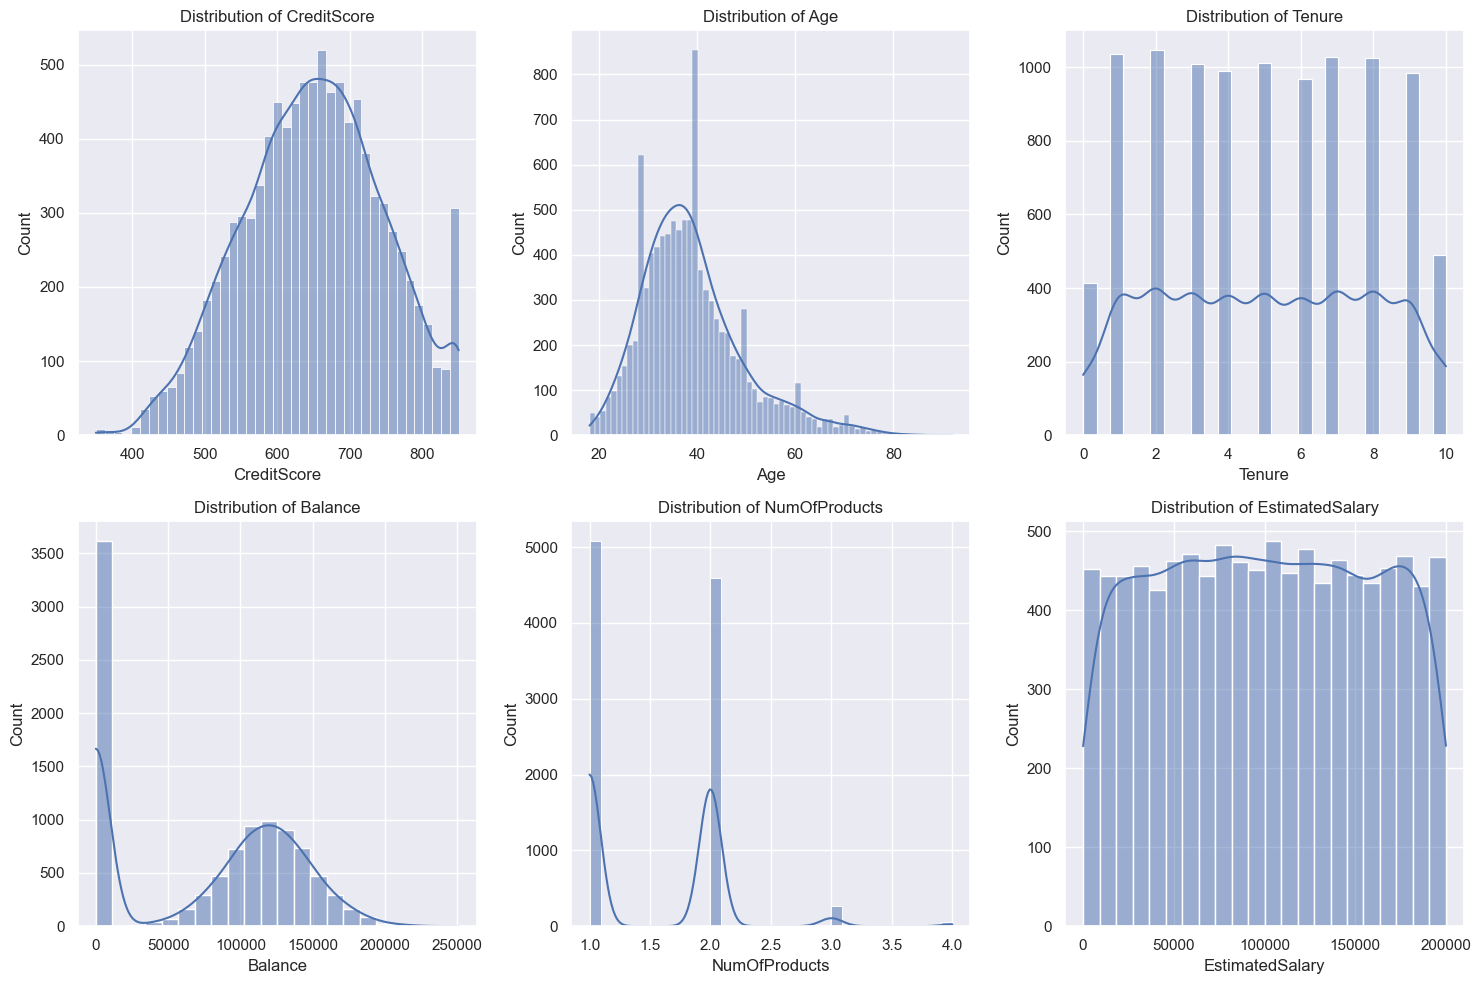

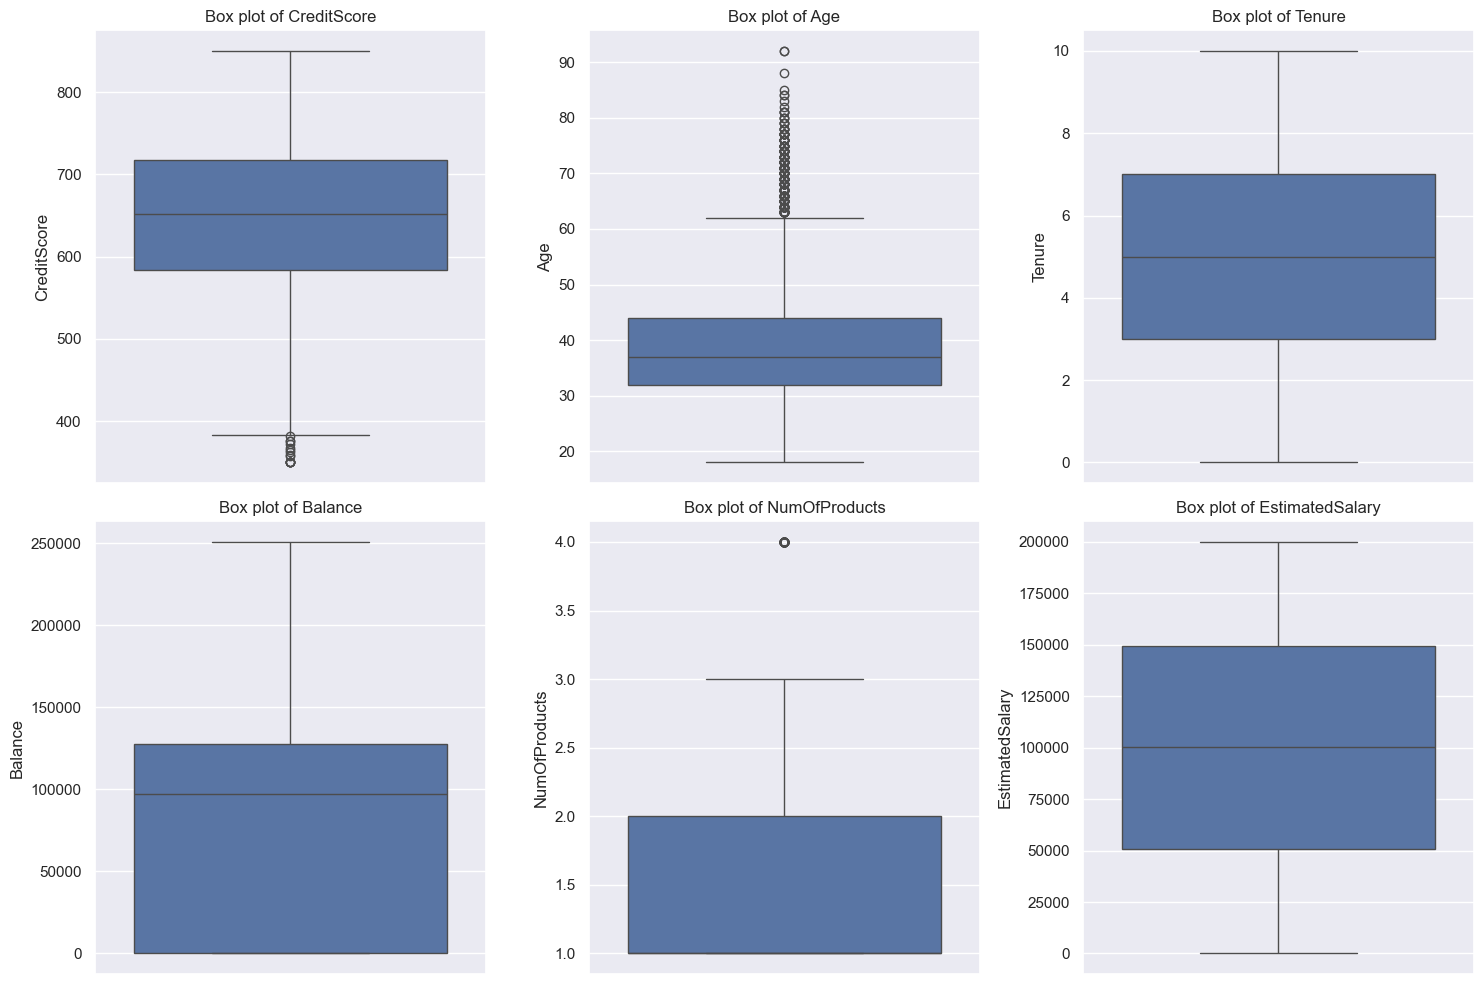

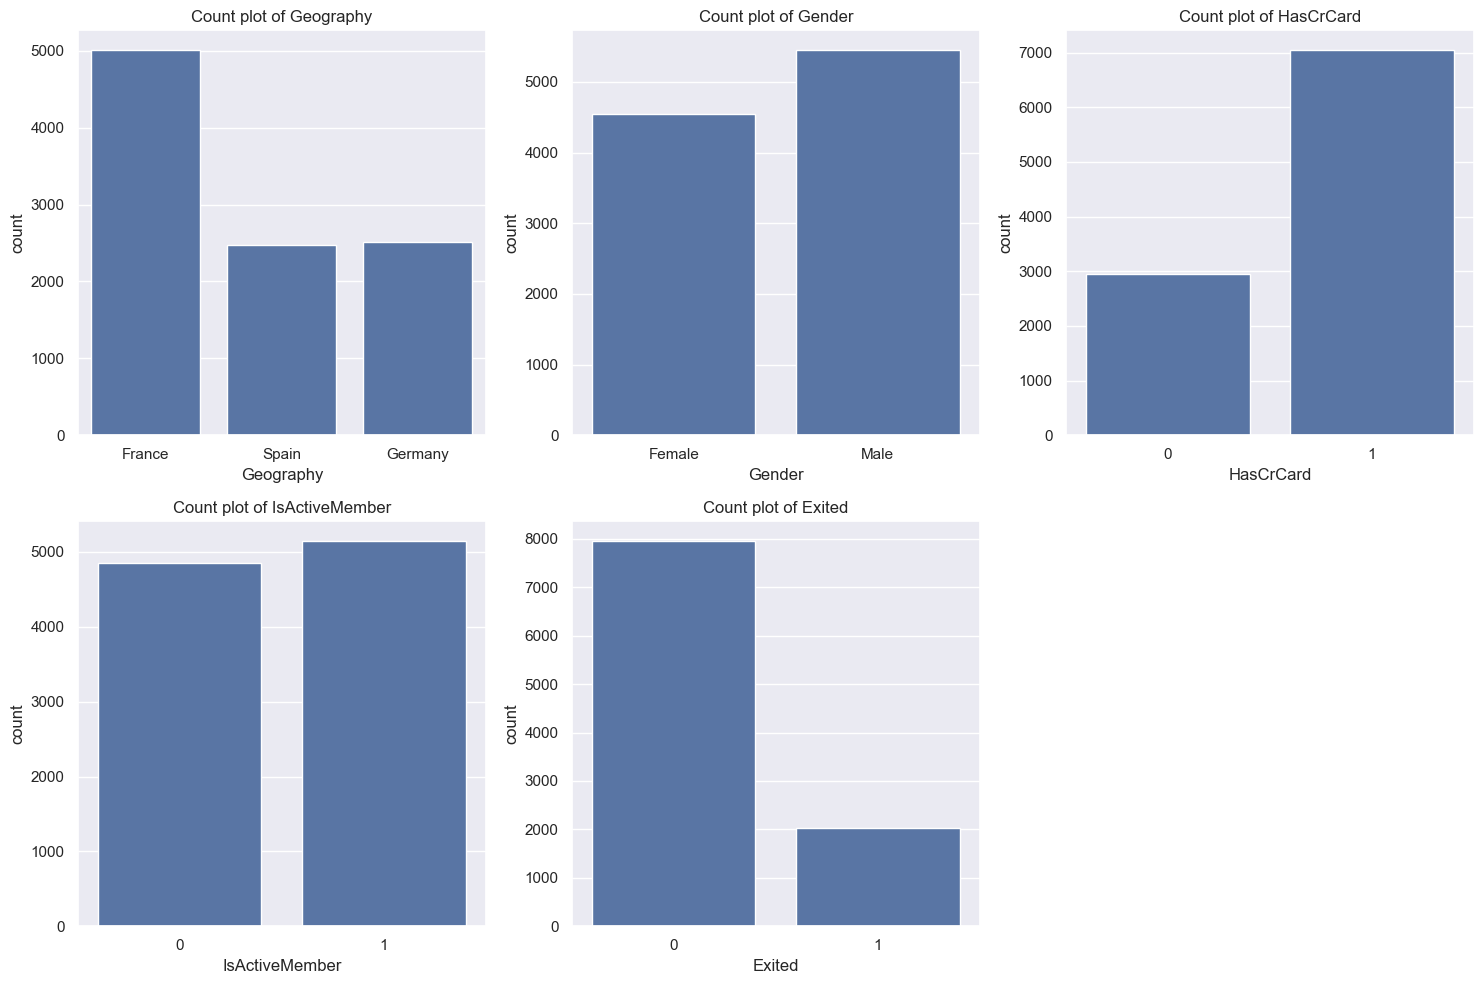

In [50]:
# Univariate Analysis
# Plotting histograms for numerical features
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i+1)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Plotting box plots for numerical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=data[feature])
    plt.title(f'Box plot of {feature}')
plt.tight_layout()
plt.show()

# Plotting count plots for categorical features
categorical_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=data[feature])
    plt.title(f'Count plot of {feature}')
plt.tight_layout()
plt.show()

### Univariate Analysis Observations

- **CreditScore**: The distribution of credit scores appears to be approximately normal, with most customers having a credit score around the mean. There are no significant outliers in the box plot.

- **Age**: The age distribution is right-skewed, indicating that there are more younger customers than older ones. The box plot shows some outliers, suggesting a few customers are significantly older than the rest.

- **Tenure**: The tenure distribution shows that many customers have been with the bank for a shorter period, with a gradual decline in the number of customers as tenure increases. The box plot indicates a few outliers with very high tenure.

- **Balance**: The balance distribution is highly skewed to the right, with many customers having a low balance and a few having very high balances. The box plot confirms the presence of significant outliers.

- **NumOfProducts**: The number of products distribution shows that most customers have one or two products, with very few having three or more. The box plot indicates some outliers with a higher number of products.

- **EstimatedSalary**: The estimated salary distribution is approximately uniform, indicating that customers have a wide range of salaries. The box plot shows a few outliers with very high salaries.

- **Geography**: The count plot shows the distribution of customers across different geographical locations. The majority of customers are from one or two locations, with fewer customers from other locations.

- **Gender**: The count plot indicates the distribution of customers by gender. There is a relatively balanced distribution between male and female customers.

- **HasCrCard**: The count plot shows the distribution of customers with and without credit cards. Most customers have a credit card.

- **IsActiveMember**: The count plot indicates the distribution of active and inactive members. There are more active members than inactive ones.

- **Exited**: The count plot shows the distribution of customers who exited the bank versus those who did not. The majority of customers did not exit the bank.

### Bivariate Analysis

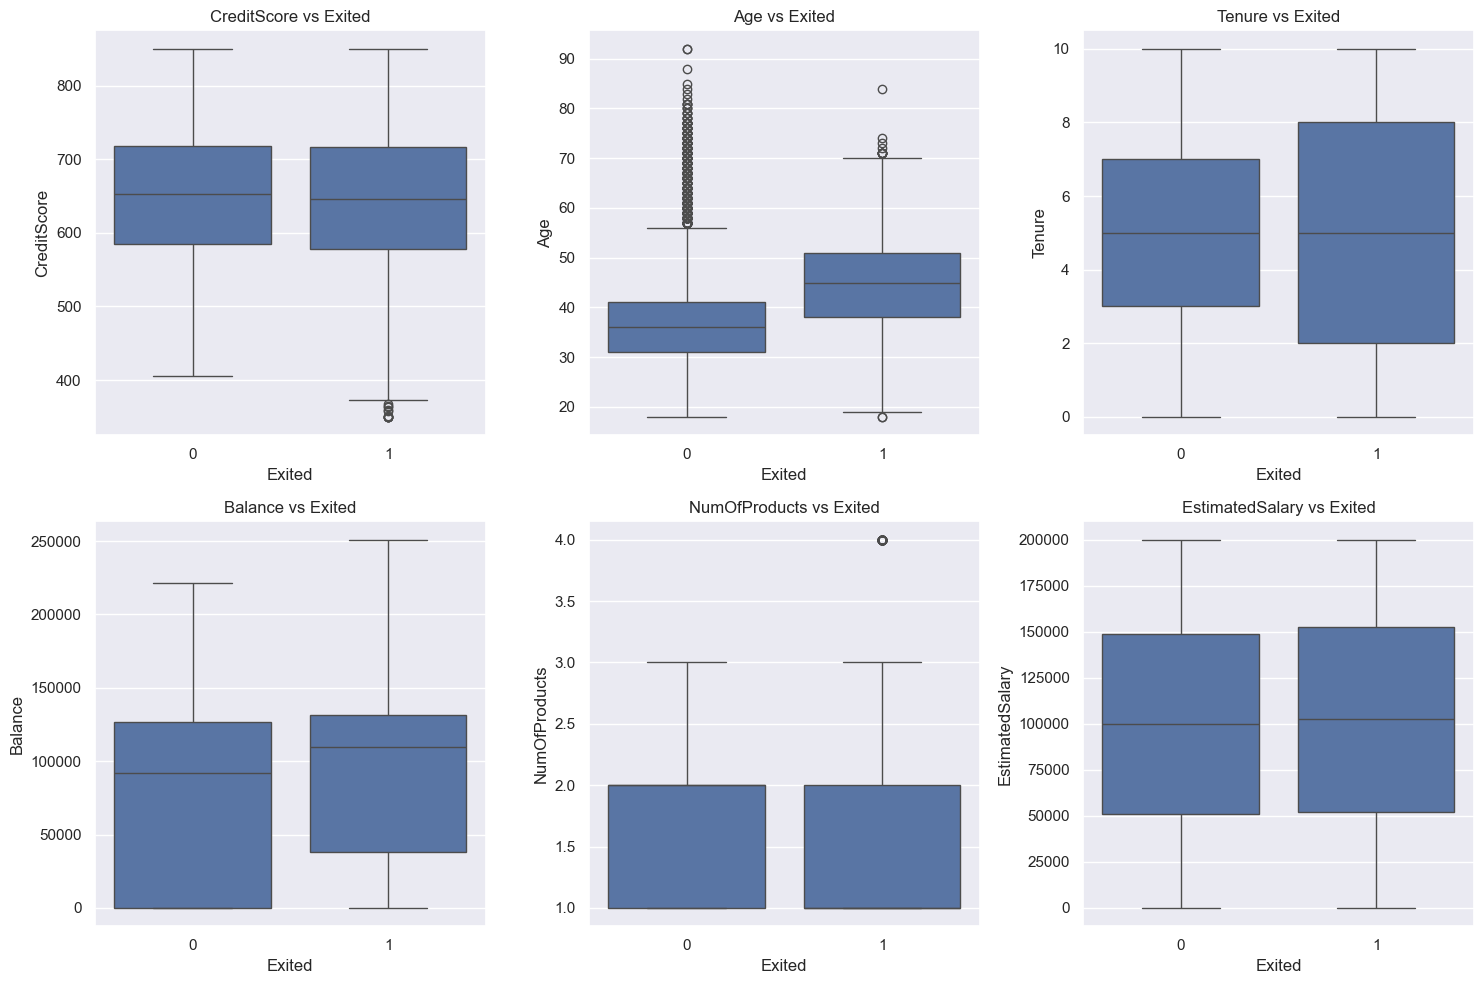

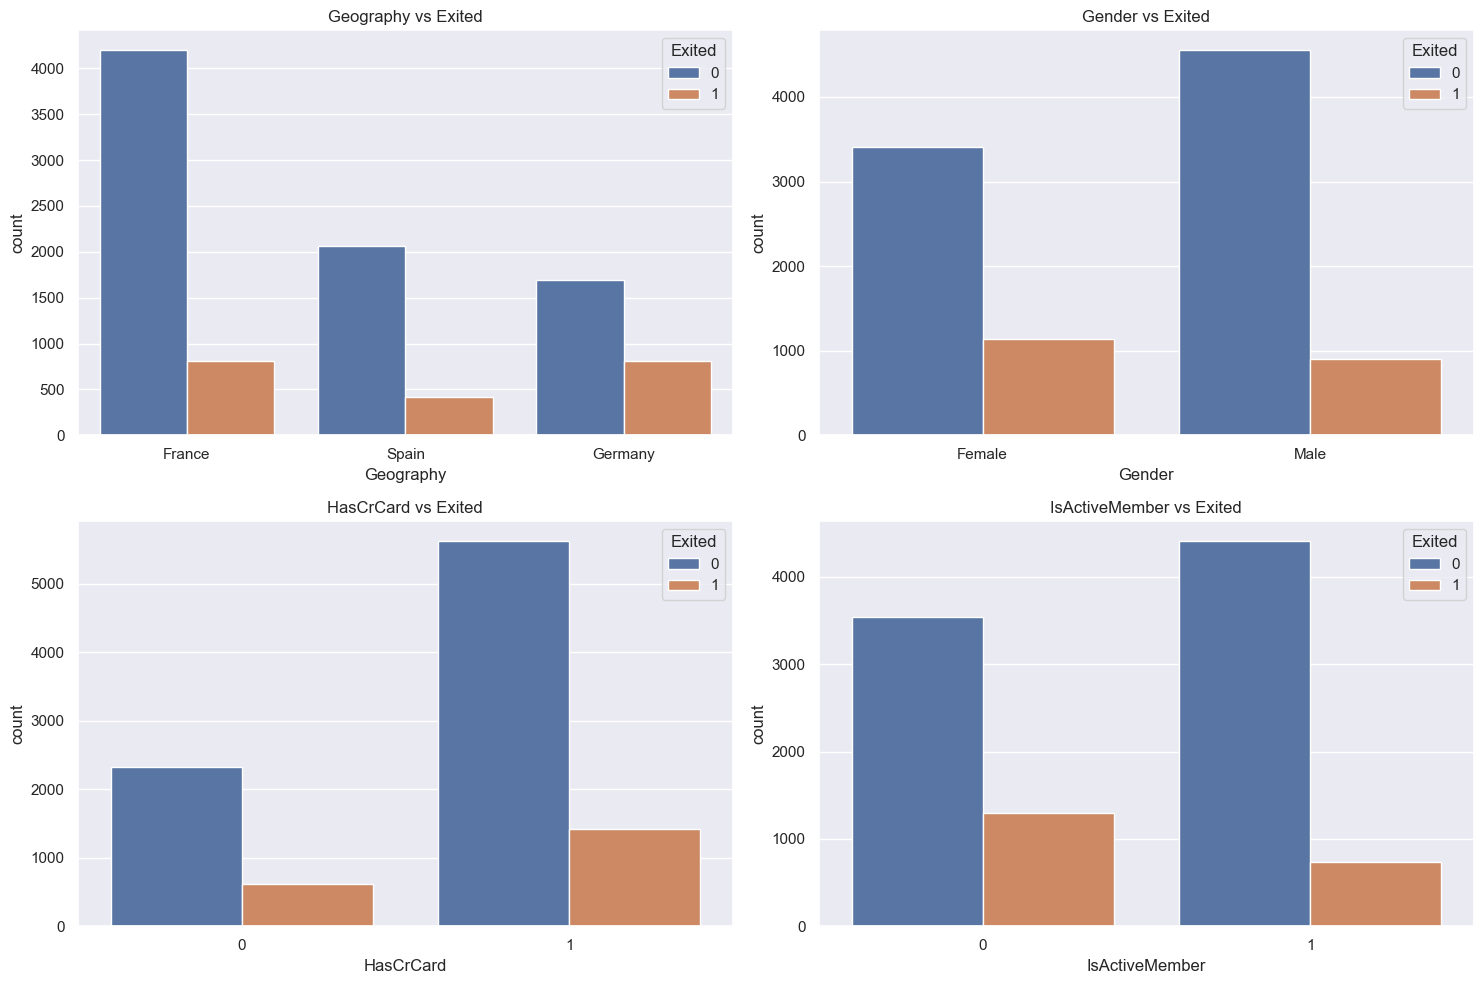

In [51]:
# Bivariate Analysis
# Plotting the relationship between numerical features and the target variable 'Exited'

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=data['Exited'], y=data[feature])
    plt.title(f'{feature} vs Exited')
plt.tight_layout()
plt.show()

# Plotting the relationship between categorical features and the target variable 'Exited'
categorical_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=data[feature], hue=data['Exited'])
    plt.title(f'{feature} vs Exited')
plt.tight_layout()
plt.show()

<Axes: >

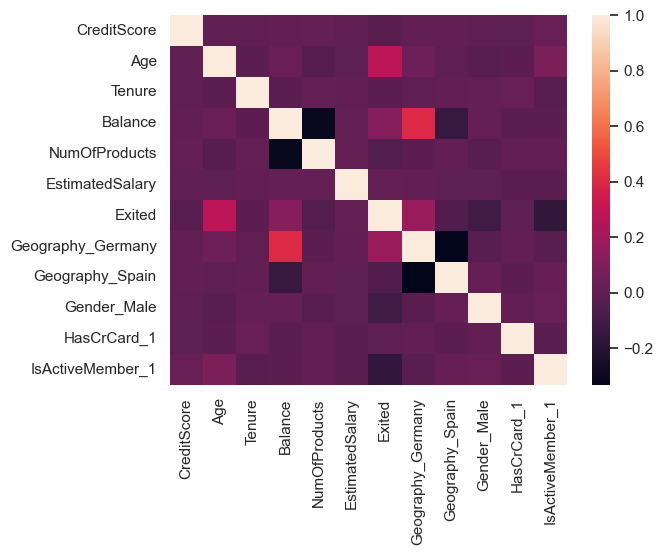

In [72]:
sns.heatmap(data.corr(), fmt='.3g')

### Bivariate Analysis Observations

- **CreditScore vs Exited**: Customers with lower credit scores are more likely to exit the bank. The median credit score for customers who exited is lower than those who did not.

- **Age vs Exited**: Older customers are more likely to exit the bank. The median age of customers who exited is higher than those who did not.

- **Tenure vs Exited**: There is no clear relationship between tenure and exiting the bank. The distribution of tenure is similar for both exited and non-exited customers.

- **Balance vs Exited**: Customers with higher balances are more likely to exit the bank. The median balance for customers who exited is higher than those who did not.

- **NumOfProducts vs Exited**: Customers with more products are more likely to exit the bank. The median number of products for customers who exited is higher than those who did not.

- **EstimatedSalary vs Exited**: There is no clear relationship between estimated salary and exiting the bank. The distribution of estimated salary is similar for both exited and non-exited customers.

- **Geography vs Exited**: The likelihood of exiting the bank varies by geography. Some locations have a higher proportion of customers who exited compared to others.

- **Gender vs Exited**: The likelihood of exiting the bank is slightly higher for female customers compared to male customers.

- **HasCrCard vs Exited**: Customers with credit cards are less likely to exit the bank compared to those without credit cards.

- **IsActiveMember vs Exited**: Active members are less likely to exit the bank compared to inactive members. The proportion of exited customers is higher among inactive members.

- **From the above plots**: We can see that there is no significant Linear relationship between the features.

- The Avg Credit Score seem to be almost the same for Active and Churned customers
- Young People seem to stick to the bank compared to older people
- The Average Bank Balance is high for Churned Customers
- The churning rate is high with German Customers
- The Churning rate is high among the Non-Active Members

## Data Preprocessing

### Dummy Variable Creation

In [54]:
# Create dummy variables for categorical features
categorical_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

# Display the first few rows of the updated dataframe
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_1,IsActiveMember_1
0,619,42,2,0.00,1,101348.88,1,0,0,0,1,1
1,608,41,1,83807.86,1,112542.58,0,0,1,0,0,1
2,502,42,8,159660.80,3,113931.57,1,0,0,0,1,0
3,699,39,1,0.00,2,93826.63,0,0,0,0,0,0
4,850,43,2,125510.82,1,79084.10,0,0,1,0,1,1


### Train-validation-test Split

In [55]:
# Define the target variable and features
X = data.drop('Exited', axis=1)
y = data['Exited']

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Display the shapes of the resulting datasets
print(f'Training set: {X_train.shape}, {y_train.shape}')
print(f'Validation set: {X_val.shape}, {y_val.shape}')
print(f'Test set: {X_test.shape}, {y_test.shape}')

Training set: (7000, 11), (7000,)
Validation set: (1500, 11), (1500,)
Test set: (1500, 11), (1500,)


### Data Normalization

In [59]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation and test data using the fitted scaler
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Display the shapes of the scaled datasets
print(f'Scaled Training set: {X_train_scaled.shape}')
print(f'Scaled Validation set: {X_val_scaled.shape}')
print(f'Scaled Test set: {X_test_scaled.shape}')

Scaled Training set: (7000, 11)
Scaled Validation set: (1500, 11)
Scaled Test set: (1500, 11)


In [60]:
# Display the columns of the dataframe to verify categorical features have been converted
data.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'EstimatedSalary', 'Exited', 'Geography_Germany', 'Geography_Spain',
       'Gender_Male', 'HasCrCard_1', 'IsActiveMember_1'],
      dtype='object')

## Model Building

### Model Evaluation Criterion

Write down the logic for choosing the metric that would be the best metric for this business scenario.

In this business scenario, the goal is to predict whether a customer will leave the bank within the next six months. The cost of false negatives (predicting a customer will stay when they will actually leave) is likely higher than the cost of false positives (predicting a customer will leave when they will actually stay). Therefore, the chosen metric should reflect the importance of correctly identifying customers who are at risk of leaving.

Potential metrics to consider:

1. **Accuracy**: Measures overall correctness of the model's predictions. Can be misleading in imbalanced datasets.
2. **Precision**: Measures the proportion of true positives among all positive predictions. High precision indicates correct positive predictions but does not account for false negatives.
3. **Recall (Sensitivity)**: Measures the proportion of true positives among all actual positives. High recall is crucial for identifying customers who will leave.
4. **F1 Score**: Harmonic mean of precision and recall. Balances precision and recall, making it a good choice when both false positives and false negatives are important.
5. **ROC-AUC**: Measures the area under the ROC curve, indicating model performance across different threshold values.

Given the importance of identifying customers who are at risk of leaving, **Recall** is a critical metric. To balance between precision and recall, the **F1 Score** is considered the best metric for this business scenario. Additionally, **ROC-AUC** can be used to evaluate overall model performance.

### Neural Network with SGD Optimizer

In [61]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping

# Define the neural network model
model_sgd = Sequential()
model_sgd.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model_sgd.add(Dense(32, activation='relu'))
model_sgd.add(Dense(1, activation='sigmoid'))

# Compile the model with SGD optimizer
model_sgd.compile(optimizer=SGD(), loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history_sgd = model_sgd.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), 
                            epochs=100, batch_size=32, callbacks=[early_stopping])

# Evaluate the model on the validation set
val_loss, val_accuracy = model_sgd.evaluate(X_val_scaled, y_val)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')

Epoch 1/100


d:\Dev\Tools\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6488 - loss: 0.6258 - val_accuracy: 0.8107 - val_loss: 0.4762
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - accuracy: 0.7886 - loss: 0.4832 - val_accuracy: 0.8173 - val_loss: 0.4438
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step - accuracy: 0.8021 - loss: 0.4536 - val_accuracy: 0.8220 - val_loss: 0.4285
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step - accuracy: 0.8181 - loss: 0.4262 - val_accuracy: 0.8273 - val_loss: 0.4193
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step - accuracy: 0.8230 - loss: 0.4161 - val_accuracy: 0.8267 - val_loss: 0.4129
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step - accuracy: 0.8200 - loss: 0.4095 - val_accuracy: 0.8300 - val_loss: 0.4073
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step - accuracy: 0.8227 - loss: 0.4124 - val_accuracy: 0.8327 - val_loss: 0.4019
Epoch 8/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step - accuracy: 0.8168 - loss: 0.4163 - val_ac

## Model Performance Improvement

### Neural Network with Adam Optimizer

In [62]:
from tensorflow.keras.optimizers import Adam

# Define the neural network model with Adam optimizer
model_adam = Sequential()
model_adam.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model_adam.add(Dense(32, activation='relu'))
model_adam.add(Dense(1, activation='sigmoid'))

# Compile the model with Adam optimizer
model_adam.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_adam = model_adam.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), 
                              epochs=100, batch_size=32, callbacks=[early_stopping])

# Evaluate the model on the validation set
val_loss_adam, val_accuracy_adam = model_adam.evaluate(X_val_scaled, y_val)
print(f'Validation Loss with Adam: {val_loss_adam}')
print(f'Validation Accuracy with Adam: {val_accuracy_adam}')

Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7890 - loss: 0.5007 - val_accuracy: 0.8340 - val_loss: 0.4011
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step - accuracy: 0.8382 - loss: 0.4028 - val_accuracy: 0.8600 - val_loss: 0.3717
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - accuracy: 0.8505 - loss: 0.3719 - val_accuracy: 0.8693 - val_loss: 0.3466
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - accuracy: 0.8567 - loss: 0.3541 - val_accuracy: 0.8607 - val_loss: 0.3473
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step - accuracy: 0.8529 - loss: 0.3514 - val_accuracy: 0.8720 - val_loss: 0.3367
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - accuracy: 0.8611 - loss: 0.3312 - val_accuracy: 0.8727 - val_loss: 0.3362
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - accuracy: 0.8610 - loss: 0.3353 - val_accuracy: 0.8740 - val_loss: 0.3299
Epoch 8/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - accuracy: 0.8583 - loss: 0.3

### Neural Network with Adam Optimizer and Dropout

In [63]:
from tensorflow.keras.layers import Dropout

# Define the neural network model with Adam optimizer and Dropout
model_adam_dropout = Sequential()
model_adam_dropout.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model_adam_dropout.add(Dropout(0.5))
model_adam_dropout.add(Dense(32, activation='relu'))
model_adam_dropout.add(Dropout(0.5))
model_adam_dropout.add(Dense(1, activation='sigmoid'))

# Compile the model with Adam optimizer
model_adam_dropout.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_adam_dropout = model_adam_dropout.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), 
                                              epochs=100, batch_size=32, callbacks=[early_stopping])

# Evaluate the model on the validation set
val_loss_adam_dropout, val_accuracy_adam_dropout = model_adam_dropout.evaluate(X_val_scaled, y_val)
print(f'Validation Loss with Adam and Dropout: {val_loss_adam_dropout}')
print(f'Validation Accuracy with Adam and Dropout: {val_accuracy_adam_dropout}')

Epoch 1/100


d:\Dev\Tools\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7454 - loss: 0.5695 - val_accuracy: 0.8220 - val_loss: 0.4324
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - accuracy: 0.8028 - loss: 0.4700 - val_accuracy: 0.8273 - val_loss: 0.4193
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step - accuracy: 0.8053 - loss: 0.4503 - val_accuracy: 0.8307 - val_loss: 0.4057
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step - accuracy: 0.8102 - loss: 0.4502 - val_accuracy: 0.8360 - val_loss: 0.3991
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - accuracy: 0.8116 - loss: 0.4441 - val_accuracy: 0.8440 - val_loss: 0.3917
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step - accuracy: 0.8190 - loss: 0.4399 - val_accuracy: 0.8507 - val_loss: 0.3830
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step - accuracy: 0.8203 - loss: 0.4178 - val_accuracy: 0.8560 - val_loss: 0.3698
Epoch 8/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step - accuracy: 0.8277 - loss: 0.4084 - val_ac

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

In [66]:
# Had to perform the following to install the imblearn library
%pip install --upgrade scikit-learn
%pip install --upgrade imbalanced-learn

from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Define the neural network model with SGD optimizer
model_sgd_smote = Sequential()
model_sgd_smote.add(Dense(64, input_dim=X_train_smote.shape[1], activation='relu'))
model_sgd_smote.add(Dense(32, activation='relu'))
model_sgd_smote.add(Dense(1, activation='sigmoid'))

# Compile the model with SGD optimizer
model_sgd_smote.compile(optimizer=SGD(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_sgd_smote = model_sgd_smote.fit(X_train_smote, y_train_smote, validation_data=(X_val_scaled, y_val), 
                                        epochs=100, batch_size=32, callbacks=[early_stopping])

# Evaluate the model on the validation set
val_loss_sgd_smote, val_accuracy_sgd_smote = model_sgd_smote.evaluate(X_val_scaled, y_val)
print(f'Validation Loss with SMOTE and SGD: {val_loss_sgd_smote}')
print(f'Validation Accuracy with SMOTE and SGD: {val_accuracy_sgd_smote}')

# Generate classification report and confusion matrix
y_val_pred_sgd_smote = (model_sgd_smote.predict(X_val_scaled) > 0.5).astype("int32")
print(classification_report(y_val, y_val_pred_sgd_smote))
print(confusion_matrix(y_val, y_val_pred_sgd_smote))

Epoch 1/100


d:\Dev\Tools\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


347/347 ━━━━━━━━━━━━━━━━━━━━ 1s 919us/step - accuracy: 0.5915 - loss: 0.6624 - val_accuracy: 0.6613 - val_loss: 0.6295
Epoch 2/100
347/347 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - accuracy: 0.6894 - loss: 0.5985 - val_accuracy: 0.7093 - val_loss: 0.5888
Epoch 3/100
347/347 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - accuracy: 0.7148 - loss: 0.5611 - val_accuracy: 0.7213 - val_loss: 0.5726
Epoch 4/100
347/347 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - accuracy: 0.7261 - loss: 0.5424 - val_accuracy: 0.7393 - val_loss: 0.5420
Epoch 5/100
347/347 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - accuracy: 0.7395 - loss: 0.5265 - val_accuracy: 0.7420 - val_loss: 0.5395
Epoch 6/100
347/347 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - accuracy: 0.7482 - loss: 0.5192 - val_accuracy: 0.7500 - val_loss: 0.5209
Epoch 7/100
347/347 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - accuracy: 0.7615 - loss: 0.5035 - val_accuracy: 0.7487 - val_loss: 0.5169
Epoch 8/100
347/347 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - accuracy: 0.7687 - loss: 0.4937 - val_

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

In [67]:
# Define the neural network model with Adam optimizer
model_adam_smote = Sequential()
model_adam_smote.add(Dense(64, input_dim=X_train_smote.shape[1], activation='relu'))
model_adam_smote.add(Dense(32, activation='relu'))
model_adam_smote.add(Dense(1, activation='sigmoid'))

# Compile the model with Adam optimizer
model_adam_smote.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_adam_smote = model_adam_smote.fit(X_train_smote, y_train_smote, validation_data=(X_val_scaled, y_val), 
                                          epochs=100, batch_size=32, callbacks=[early_stopping])

# Evaluate the model on the validation set
val_loss_adam_smote, val_accuracy_adam_smote = model_adam_smote.evaluate(X_val_scaled, y_val)
print(f'Validation Loss with SMOTE and Adam: {val_loss_adam_smote}')
print(f'Validation Accuracy with SMOTE and Adam: {val_accuracy_adam_smote}')

# Generate classification report and confusion matrix
y_val_pred_adam_smote = (model_adam_smote.predict(X_val_scaled) > 0.5).astype("int32")
print(classification_report(y_val, y_val_pred_adam_smote))
print(confusion_matrix(y_val, y_val_pred_adam_smote))

Epoch 1/100


d:\Dev\Tools\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


347/347 ━━━━━━━━━━━━━━━━━━━━ 1s 980us/step - accuracy: 0.7081 - loss: 0.5852 - val_accuracy: 0.7660 - val_loss: 0.4800
Epoch 2/100
347/347 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - accuracy: 0.7814 - loss: 0.4691 - val_accuracy: 0.7433 - val_loss: 0.4963
Epoch 3/100
347/347 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - accuracy: 0.7963 - loss: 0.4357 - val_accuracy: 0.7693 - val_loss: 0.4505
Epoch 4/100
347/347 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - accuracy: 0.8017 - loss: 0.4354 - val_accuracy: 0.7987 - val_loss: 0.4253
Epoch 5/100
347/347 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - accuracy: 0.8062 - loss: 0.4199 - val_accuracy: 0.7747 - val_loss: 0.4545
Epoch 6/100
347/347 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - accuracy: 0.8110 - loss: 0.4061 - val_accuracy: 0.7740 - val_loss: 0.4532
Epoch 7/100
347/347 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - accuracy: 0.8105 - loss: 0.4069 - val_accuracy: 0.7827 - val_loss: 0.4480
Epoch 8/100
347/347 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - accuracy: 0.8184 - loss: 0.3998 - val_

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [68]:
# Define the neural network model with Adam optimizer and Dropout
model_adam_smote_dropout = Sequential()
model_adam_smote_dropout.add(Dense(64, input_dim=X_train_smote.shape[1], activation='relu'))
model_adam_smote_dropout.add(Dropout(0.5))
model_adam_smote_dropout.add(Dense(32, activation='relu'))
model_adam_smote_dropout.add(Dropout(0.5))
model_adam_smote_dropout.add(Dense(1, activation='sigmoid'))

# Compile the model with Adam optimizer
model_adam_smote_dropout.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_adam_smote_dropout = model_adam_smote_dropout.fit(X_train_smote, y_train_smote, validation_data=(X_val_scaled, y_val), 
                                                          epochs=100, batch_size=32, callbacks=[early_stopping])

# Evaluate the model on the validation set
val_loss_adam_smote_dropout, val_accuracy_adam_smote_dropout = model_adam_smote_dropout.evaluate(X_val_scaled, y_val)
print(f'Validation Loss with SMOTE, Adam, and Dropout: {val_loss_adam_smote_dropout}')
print(f'Validation Accuracy with SMOTE, Adam, and Dropout: {val_accuracy_adam_smote_dropout}')

# Generate classification report and confusion matrix
y_val_pred_adam_smote_dropout = (model_adam_smote_dropout.predict(X_val_scaled) > 0.5).astype("int32")
print(classification_report(y_val, y_val_pred_adam_smote_dropout))
print(confusion_matrix(y_val, y_val_pred_adam_smote_dropout))

Epoch 1/100


d:\Dev\Tools\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


347/347 ━━━━━━━━━━━━━━━━━━━━ 1s 956us/step - accuracy: 0.6054 - loss: 0.6629 - val_accuracy: 0.7027 - val_loss: 0.5870
Epoch 2/100
347/347 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - accuracy: 0.7087 - loss: 0.5762 - val_accuracy: 0.7407 - val_loss: 0.5260
Epoch 3/100
347/347 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/step - accuracy: 0.7316 - loss: 0.5465 - val_accuracy: 0.7460 - val_loss: 0.5097
Epoch 4/100
347/347 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step - accuracy: 0.7437 - loss: 0.5267 - val_accuracy: 0.7507 - val_loss: 0.4829
Epoch 5/100
347/347 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - accuracy: 0.7560 - loss: 0.5150 - val_accuracy: 0.7567 - val_loss: 0.4681
Epoch 6/100
347/347 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step - accuracy: 0.7720 - loss: 0.5023 - val_accuracy: 0.7607 - val_loss: 0.4554
Epoch 7/100
347/347 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step - accuracy: 0.7724 - loss: 0.4929 - val_accuracy: 0.7753 - val_loss: 0.4563
Epoch 8/100
347/347 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - accuracy: 0.7698 - loss: 0.4949 - val_

## Model Performance Comparison and Final Model Selection

In [69]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define a function to calculate and print the performance metrics
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    
    print(f'{model_name} Performance:')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'ROC-AUC: {roc_auc:.4f}')
    print('')

# Evaluate the models
evaluate_model(y_val, y_val_pred_sgd_smote, 'SGD with SMOTE')
evaluate_model(y_val, y_val_pred_adam_smote, 'Adam with SMOTE')
evaluate_model(y_val, y_val_pred_adam_smote_dropout, 'Adam with SMOTE and Dropout')

# Based on the evaluation, select the final model
# Assuming we prioritize F1 Score and ROC-AUC for final model selection
f1_scores = [
    f1_score(y_val, y_val_pred_sgd_smote),
    f1_score(y_val, y_val_pred_adam_smote),
    f1_score(y_val, y_val_pred_adam_smote_dropout)
]

roc_aucs = [
    roc_auc_score(y_val, y_val_pred_sgd_smote),
    roc_auc_score(y_val, y_val_pred_adam_smote),
    roc_auc_score(y_val, y_val_pred_adam_smote_dropout)
]

# Select the model with the highest F1 Score and ROC-AUC
best_model_index = max(range(len(f1_scores)), key=lambda i: (f1_scores[i], roc_aucs[i]))
best_model_name = ['SGD with SMOTE', 'Adam with SMOTE', 'Adam with SMOTE and Dropout'][best_model_index]

print(f'The final selected model is: {best_model_name}')

SGD with SMOTE Performance:
Accuracy: 0.8007
Precision: 0.4818
Recall: 0.6972
F1 Score: 0.5698
ROC-AUC: 0.7610

Adam with SMOTE Performance:
Accuracy: 0.8047
Precision: 0.4879
Recall: 0.6373
F1 Score: 0.5527
ROC-AUC: 0.7405

Adam with SMOTE and Dropout Performance:
Accuracy: 0.8240
Precision: 0.5273
Recall: 0.6796
F1 Score: 0.5938
ROC-AUC: 0.7687

The final selected model is: Adam with SMOTE and Dropout


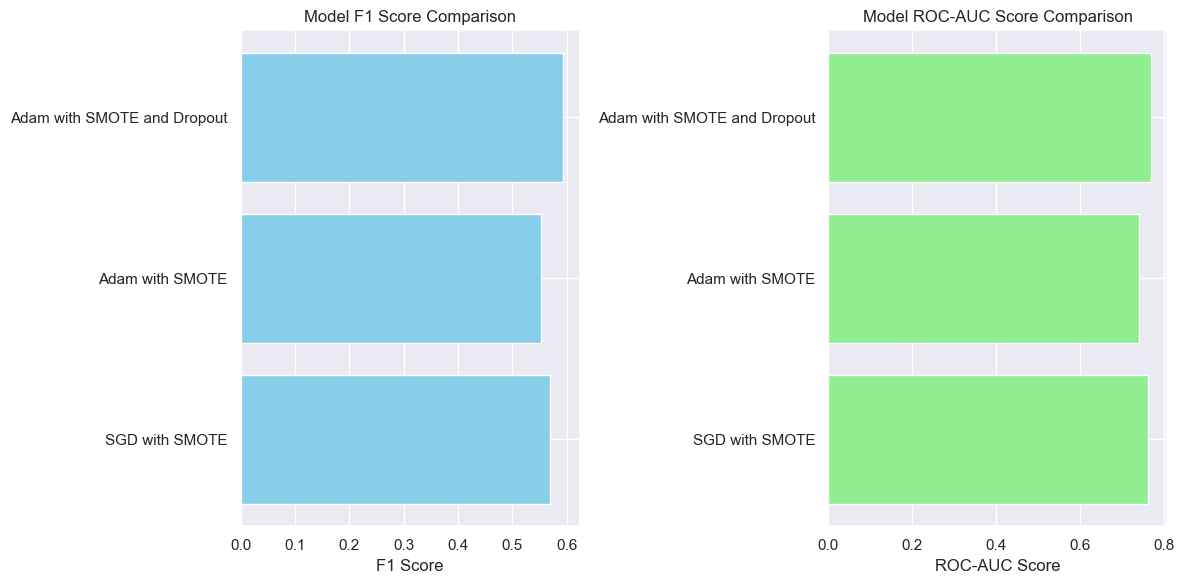

In [ ]:
# Graphical comparision of model performance
import matplotlib.pyplot as plt

# Define the model names and their corresponding F1 Scores and ROC-AUC values
model_names = ['SGD with SMOTE', 'Adam with SMOTE', 'Adam with SMOTE and Dropout']
f1_scores = [
    f1_score(y_val, y_val_pred_sgd_smote),
    f1_score(y_val, y_val_pred_adam_smote),
    f1_score(y_val, y_val_pred_adam_smote_dropout)
]
roc_aucs = [
    roc_auc_score(y_val, y_val_pred_sgd_smote),
    roc_auc_score(y_val, y_val_pred_adam_smote),
    roc_auc_score(y_val, y_val_pred_adam_smote_dropout)
]

# Plot F1 Scores
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(model_names, f1_scores, color='skyblue')
plt.xlabel('F1 Score')
plt.title('Model F1 Score Comparison')

# Plot ROC-AUC Scores
plt.subplot(1, 2, 2)
plt.barh(model_names, roc_aucs, color='lightgreen')
plt.xlabel('ROC-AUC Score')
plt.title('Model ROC-AUC Score Comparison')

plt.tight_layout()
plt.show()

In [70]:
from sklearn.metrics import precision_recall_curve

# Assuming 'Adam with SMOTE and Dropout' is the best model based on previous evaluation
best_model = model_adam_smote_dropout

# Predict probabilities on the validation set
y_val_prob = best_model.predict(X_val_scaled)

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_val, y_val_prob)

# Calculate F1 score for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)

# Find the threshold that gives the maximum F1 score
best_threshold = thresholds[f1_scores.argmax()]

print(f'Best Threshold: {best_threshold}')

# Predict using the best threshold
y_val_pred_best = (y_val_prob >= best_threshold).astype(int)

# Evaluate the model with the best threshold
evaluate_model(y_val, y_val_pred_best, 'Best Model with Optimal Threshold')

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step
Best Threshold: 0.6300078630447388
Best Model with Optimal Threshold Performance:
Accuracy: 0.8633
Precision: 0.6586
Recall: 0.5775
F1 Score: 0.6154
ROC-AUC: 0.7538



## Actionable Insights and Business Recommendations

### Actionable Insights

1. **Credit Score**: Customers with lower credit scores are more likely to exit the bank. Implementing credit score improvement programs and offering personalized financial advice could help retain these customers.

2. **Age**: Older customers are more likely to leave the bank. Tailoring products and services to meet the needs of older customers, such as retirement planning and senior-friendly banking services, could improve retention.

3. **Balance**: Customers with higher balances are more likely to exit. Offering exclusive benefits and personalized services to high-balance customers could help in retaining them.

4. **Number of Products**: Customers with more products are more likely to leave. Ensuring that customers are satisfied with the products they have and offering bundled services or loyalty programs could help in reducing churn.

5. **Geography**: The likelihood of exiting varies by geography. Focusing on regions with higher churn rates and understanding the specific needs and preferences of customers in those regions could help in improving retention.

6. **Gender**: Female customers are slightly more likely to leave the bank. Offering gender-specific financial products and services, and addressing any specific concerns of female customers could help in retaining them.

7. **Credit Card Ownership**: Customers without credit cards are more likely to leave. Encouraging customers to own and use credit cards by offering attractive benefits and rewards could help in reducing churn.

8. **Active Membership**: Inactive members are more likely to leave. Engaging inactive members through targeted marketing campaigns, personalized offers, and regular communication could help in making them active and reducing churn.

### Business Recommendations

1. **Personalized Customer Engagement**: Implement personalized engagement strategies based on customer profiles, such as credit score, age, balance, and product usage. Use data analytics to identify at-risk customers and proactively reach out to them with tailored offers and services.

2. **Customer Loyalty Programs**: Develop and enhance customer loyalty programs that reward customers for their continued relationship with the bank. Offer incentives for using multiple products and services, and provide exclusive benefits to high-balance and long-term customers.

3. **Financial Education and Advisory Services**: Offer financial education and advisory services to help customers improve their credit scores, manage their finances better, and make informed decisions about banking products. This can build trust and loyalty among customers.

4. **Regional Focus**: Analyze regional differences in customer behavior and preferences. Develop region-specific marketing and service strategies to address the unique needs of customers in different geographical areas.

5. **Gender-Specific Initiatives**: Introduce gender-specific financial products and services, and address any specific concerns of female customers. This could include women-centric savings accounts, investment plans, and financial advisory services.

6. **Credit Card Promotion**: Promote the benefits of owning and using credit cards through targeted marketing campaigns. Offer attractive rewards, cashback, and discounts to encourage customers to apply for and use credit cards.

7. **Reactivation Campaigns**: Design and implement reactivation campaigns for inactive members. Use personalized communication, special offers, and incentives to encourage inactive members to become active again.

8. **Customer Feedback and Improvement**: Regularly collect and analyze customer feedback to identify areas of improvement in products and services. Use this feedback to make necessary changes and enhancements, ensuring that customer needs and expectations are met.

By implementing these actionable insights and business recommendations, the bank can improve customer retention, reduce churn, and enhance overall customer satisfaction and loyalty.

*



<font size=6 color='blue'>Power Ahead</font>
___